## Scientific Computing 2023: Homework Assignment 2
Due Sunday October 22, 2023 (23:59)

### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$.
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

### Answer 1

* If $\|\cdot\|$ is the $l^2$-norm and $A$ is arbitrary, then

$$\kappa(A)=\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}}$$

$A^* A = \left(\begin{matrix}1 & 0\\ q & 1\end{matrix}\right) \left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right) = \left(\begin{matrix}1 & q\\ q & q^2 + 1\end{matrix}\right)$.

In order to obtain $\lambda_i$, we need to solve next equation: $$det(A^*A -\lambda I) = det\left(\begin{matrix}1 -\lambda& q\\ q & q^2 + 1-\lambda\end{matrix}\right) = 0$$



$$ 4q^2+1- \lambda -\lambda q^2 -\lambda+ \lambda^2 -q^2 = 0$$

$$ \lambda^2 - \lambda(2+q^2) +1 =0 $$

Then we obtain the eigenvalues: $\lambda_{max,min} = \frac{1}{2} (2+q^2 \pm \sqrt{q^4+4q^2})$.
So the condition number with respect to the $l^2$-norm:

$$\kappa(A_q) =\sqrt{\frac{\lambda_{\max}(A^*A)}{\lambda_{\min}(A^*A)}} =  \sqrt{\frac{2+q^2 + \sqrt{q^4 + 4q^2}}{2+q^2 -\sqrt{q^4 + 4q^2}}}$$

* Let the values be as follows:

$\mathbf b =  \left(\begin{matrix}10^7 & 1\end{matrix}\right)^T$,

$\Delta\mathbf b =  \left(\begin{matrix}10^8 & 10^9\end{matrix}\right)^T$,

$q = 10^{10} $

Let's calculate $\frac{\|\Delta \mathbf{x}\|}{\|\mathbf{x}\|}/\frac{\|\Delta \mathbf{b}\|}{\|\mathbf{b}\|}$ and compare it with $10^6$:


In [32]:
import numpy as np

q = 10**10
A = np.array([[1,q],[0,1]])
b = np.array([10**7,1])
d_b = np.array([10**8,10**9])

x_norm = np.linalg.norm(np.dot(np.linalg.inv(A), b))
d_x_norm = np.linalg.norm(np.dot(np.linalg.inv(A), d_b))
b_norm = np.linalg.norm(b)
d_b_norm =np.linalg.norm(d_b)

#lets calculate the fraction of fractions of norms to compare it with 10^6
fraction = (d_x_norm/x_norm) / (d_b_norm/b_norm)


print(f'{fraction:.2e} is greater than 10^6, so considered parameters b, d_b and q satisfy the task.')

9.96e+06 is greater than 10^6, so considered parameters b, d_b and q satisfy the task.


### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?

### Answer 2

 Min error: 2.554e-08, h of min error: 1e-08.


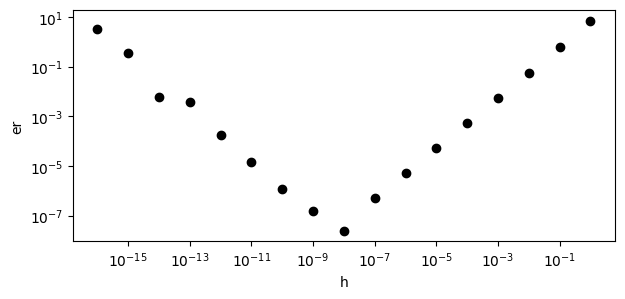

In [33]:
import matplotlib.pyplot as plt

def tan_derivative(x):
    return 1/(np.cos(x))**2

def finite_difference(f, x, h):
    return (f(x + h) - f(x))/h

def centered_difference(f, x, h):
    return (f(x + h) - f(x - h))/(2 *h)

h_list = []
er_finite = []

for k in range(17):
    h_list.append(10**(-k))
    er_finite.append(np.abs(finite_difference(np.tan, 1, h_list[k]) - tan_derivative(1)))

fig = plt.figure(figsize=[7,3])
plt.scatter(h_list, er_finite, color = 'black')
plt.xlabel('h')
plt.ylabel('er')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log');

print(f' Min error: {min(er_finite).round(11)}, h of min error: {h_list[er_finite.index(min(er_finite))]}.')

In addition to approximation errors, which increase with increasing step h, rounding errors occur, which, on the contrary, increase with decreasing grid step (i.e., with increasing number of steps).


 Min error: 6.224e-12, h of min error: 1e-07.


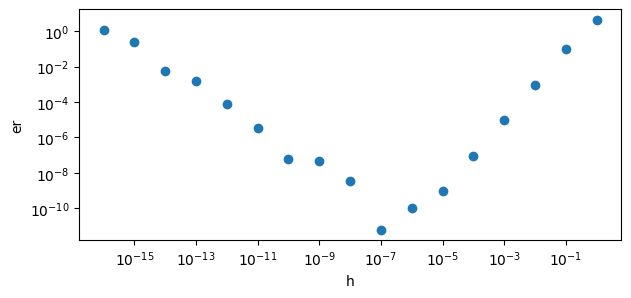

In [34]:
# Lets use centered difference approximation instead of finite-difference

h_list = []
er_cent = []

for k in range(17):
    h_list.append(10**(-k))
    er_cent.append(np.abs(centered_difference(np.tan, 1, h_list[k]) - tan_derivative(1)))

fig = plt.figure(figsize=[7,3])
plt.scatter(h_list, er_cent)
plt.xlabel('h')
plt.ylabel('er')
plt.gca().set_xscale('log')
plt.gca().set_yscale('log');

print(f' Min error: {min(er_cent).round(15)}, h of min error: {h_list[er_cent.index(min(er_cent))]}.')


Let's explain results theoretically.
Since $\tilde f (x + h) = f (x + h) + \varepsilon_1$ and $\tilde f (x − h) = f (x − h) + \varepsilon_2$, where $|\varepsilon_1|$,|$\varepsilon_2$| ≈
$\varepsilon_r,$ where $\varepsilon_r$ represents machine epsilon; the difference between the correct f(x) and the machine version of the
finite-difference formula:

$$f'_{correct}(x) - {f'}_{machine} (x) = f'(x) - \dfrac{\tilde{f}(x+h) -\tilde{f}(x)}{h} = f'(x) - \dfrac{f(x+h) + \varepsilon_1 - f(x) - \varepsilon_2}{h} =$$

$$=f'(x) - \dfrac{f(x+h) - f(x)}{h} + \dfrac{\varepsilon_2 - \varepsilon_1}{h} = \text{[apply Taylor Series for  $f(x+h)$, c $\in [x, x+h]$]} =\\
= -\dfrac{h}{2} f''(c) + \dfrac{\varepsilon_2 - \varepsilon_1}{h} $$

$$\left|\dfrac{\varepsilon_2 - \varepsilon_1}{h}\right| \leq\dfrac{2 \varepsilon_r}{h}$$

Then absolute value of error: $Er(h)\equiv  \dfrac{h}{2} |f''(c)| + \dfrac{2 \varepsilon_r}{h}$

Let's differentiate $Er(h)$ in order to obtain its minimum: $$\frac{dEr(h)}{dh} = \dfrac{\left|f''(c)\right|}{2} - \dfrac{2 \varepsilon_r}{h^2} = 0,$$

$$h_0 = 2 \sqrt{\dfrac{\varepsilon_r}{\left|f''(c)\right|}}=[f(x)=tan (x)] \approx 9.124 \cdot 10^{-9}.$$

$$Er(h_0) \approx 9.735 \cdot 10^{-8}.$$

Similarly for centered difference formula we get:

$Er(h)\equiv  \dfrac{h^2}{6} |f'''(c)| + \dfrac{\varepsilon_r}{h}$, $c \in [x-h,x+h]$

Let's differentiate $Er(h)$ in order to obtain its minimum: $$\frac{dEr(h)}{dh} = \dfrac{h\left| f'''(c)\right|}{3} - \dfrac{\varepsilon_r}{h^2} = 0,$$

$$h_0 = \left( \dfrac{3 \varepsilon_r}{\left|f'''(c)\right|} \right)^{\frac{1}{3}} =[f(x)=tan (x)] \approx 2.273 \cdot 10^{-6}.$$

$$Er(h_0) \approx 1.465 \cdot 10^{-10}.$$

As we can see, the experimentally obtained values are approximately consistent with the theory.
For centered difference formula we obtaibed much less minimum value of error than for finite-difference version, and the minimum was achieved at smaller h-value.

In [35]:
# code for calculating of h0 and Er(h0) mentioned above

#  finite-difference version
h0 = 2*np.sqrt(np.finfo(float).eps/abs(2*np.sin(1)/(np.cos(1)**3))).round(12)
Er_h0 = (h0*abs(abs(2*np.sin(1)/(np.cos(1)**3)))/2 + 2*np.finfo(float).eps/h0).round(11)
print(f'finite-difference version: h0 = {h0}, Er(h0) = {Er_h0}')

# centered difference version
h0 = ((3 * np.finfo(float).eps/abs((2 + 4 * np.sin(1)**2)/(np.cos(1)**4)))**(1/3)).round(9)
Er_h0 = (h0**2*abs((2 + 4 * np.sin(1)**2)/(np.cos(1)**4))/6 + np.finfo(float).eps/h0).round(13)
print(f'centered difference version: h0 = {h0}, Er(h0) = {Er_h0}')

finite-difference version: h0 = 9.124e-09, Er(h0) = 9.735e-08
centered difference version: h0 = 2.273e-06, Er(h0) = 1.465e-10


### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

### Answer 3

In [36]:
def custom_fit(X_train, y_train, mu):
    Q = X_train.T.dot(X_train)
    y1 = X_train.T.dot(y_train)

    return np.linalg.inv(Q+mu*np.eye(X_train.shape[1])).dot(y1)

def custom_predict(X_test, coeffs):
    return X_test.dot(coeffs)

def getRRMSE(y_test, y_pred):
    return np.linalg.norm(y_pred-y_test)/np.linalg.norm(y_test-np.mean(y_test))

# Implementing deafult kfold gridsearch with number of splits = 5
def custom_gridsearch(X_train, y_train, X_test):
    n_splits = 5
    fold = Ntrain // n_splits
    RRMSEs = []
    mus = np.logspace(-6, 2, 100)

    for mu in mus:
        RRMSE = 0

        for n in range(n_splits):
            X_train_fold = np.concatenate((X_train[0:n*fold], X_train[(n+1)*fold: Ntrain]))
            y_train_fold = np.concatenate((y_train[0:n*fold], y_train[(n+1)*fold: Ntrain]))

            X_test_fold = X_train[n*fold: (n+1)*fold]
            y_test_fold = y_train[n*fold: (n+1)*fold]

            coefs = custom_fit(X_train_fold, y_train_fold, mu)
            y_pred_fold = custom_predict(X_test_fold, coefs)
            RRMSE += getRRMSE(y_test_fold, y_pred_fold)

        RRMSEs.append(RRMSE)

    mu_best = mus[np.argmin(RRMSEs)]
    coeffs = custom_fit(X_train, y_train, mu_best)
    y_pred = custom_predict(X_test, coeffs)

    return y_pred

In [37]:
# Testing on first dataset

data = np.loadtxt('slice_localization_data.csv', skiprows=1, delimiter=',')

N = len(data)
X = data[:, 1:-1] # input values
y = data[:, -1]

Ntrain = 300

inds = np.random.permutation(N)

train = inds[:Ntrain]
test = inds[Ntrain:]
X_train = X[train]
y_train = y[train]
X_test = X[test]
y_test = y[test]

In [38]:
# Comparing results of algorithm with results of linear models from sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Custom algorithm (custom ridge + custom gridsearch)
y_pred = custom_gridsearch(X_train, y_train, X_test)
print(f'Custom algorithm RRMSE: {getRRMSE(y_test, y_pred).round(3)}')

# Gridsearch Ridge
grid = {
    'alpha':np.logspace(-6,2,100)
}
gs = GridSearchCV(Ridge(), param_grid=grid)
gs.fit(X_train, y_train)
print(f'Ridge() RRMSE: {getRRMSE(y_test, gs.predict(X_test)).round(3)}')

# Linear regression without gridsearch
clf = LinearRegression()
clf.fit(X_train, y_train)
print(f'LinearRegression() RRMSE: {getRRMSE(y_test, clf.predict(X_test)).round(3)}')

Custom algorithm RRMSE: 0.483
Ridge() RRMSE: 0.452
LinearRegression() RRMSE: 1.216


In [39]:
# Testing using second dataset

data = np.loadtxt('CASP.csv', skiprows=1, delimiter=',')
N = len(data)
X = data[:, 1:] # input values
y = data[:, 0] # output values

Ntrain = 300

inds = np.random.permutation(N)

train = inds[:Ntrain]
test = inds[Ntrain:]
X_train = X[train]
y_train = y[train]
X_test = X[test]
y_test = y[test]

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Custom algorithm (custom ridge + custom gridsearch)
y_pred = custom_gridsearch(X_train, y_train, X_test)
print(f'Custom algorithm RRMSE: {getRRMSE(y_test, y_pred).round(3)}')

# Gridsearch Ridge
grid = {
    'alpha':np.logspace(-6,2,100)
}
gs = GridSearchCV(Ridge(), param_grid=grid)
gs.fit(X_train, y_train)
print(f'Ridge() RRMSE: {getRRMSE(y_test, gs.predict(X_test)).round(3)}')

# Linear regression without gridsearch
clf = LinearRegression()
clf.fit(X_train, y_train)
print(f'LinearRegression() RRMSE: {getRRMSE(y_test, clf.predict(X_test)).round(3)}')

Custom algorithm RRMSE: 0.898
Ridge() RRMSE: 0.902
LinearRegression() RRMSE: 0.902


Values for our algorithm are close to values for sklearn ridge for both datasets.

### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

### Answer 4

Leapfrog integration method:

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}+f_1(\tilde x_n)\Delta t
\end{align}

Considering dynamics of the harmonic oscillator we want to solve next system:

$$\frac{d}{dt}{x\choose v}={v\choose f_1(x)}= {v\choose -\frac{kx}{m}}$$

\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2} -\frac{k}{m}\tilde x_n\Delta t
\end{align}
$$\Downarrow$$

$$\left(\begin{matrix}\tilde x_{n+1}\\ \tilde v_{n+1/2}\end{matrix}\right)=\left(\begin{matrix}1 - \frac{k}{m} {\Delta t}^2 &\Delta t\\-\frac{k}{m}\Delta t & 1 \end{matrix}\right) \left(\begin{matrix}\tilde x_{n}\\ \tilde v_{n-1/2}\end{matrix}\right)$$

$$\det\left(\begin{matrix}1 - \frac{k}{m} {\Delta t}^2 - \lambda &\Delta t\\-\frac{k}{m}\Delta t & 1 - \lambda \end{matrix}\right) = 0$$

We form a basis from the eigenvectors, decompose the initial condition according to this basis, then we move forward using a matrix, the matrix acts on the eigenvectors by multiplying by the eigenvalue, after n steps of the algorithm, we multiply the eigenvectors by the eigenvalues n times.

Let's say $\lambda_{1,2}$ - eigenvalues matrix, $\textbf{y}_{1,2}$ eigenvectors, then

$$\left(\begin{matrix}\tilde x_{n+1}\\ \tilde v_{n+1/2} \end{matrix}\right) = {\lambda_1}^n \textbf{y}_{1} + {\lambda_2}^n \textbf{y}_{2},$$

$$\text{where  }\lambda_{1,2} = \frac{2-\frac{k\Delta t^2}{m} \pm \sqrt{\frac{k^2\Delta t^4}{m^2} - \frac{4k\Delta t^2}{m}}}{2}$$

In case of $\frac{k{\Delta t}^2}{m}  > 4$ one can notice, that $|\lambda|>1$, so $|\lambda^n|\to\inf, $ if $n \to \inf$; so simulation diverge as  $𝑛 \to \infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$.

Answer: $\frac{k{\Delta t}^2}{m}  > 4$

### Problem 5 (2 points)
Suppose that we are solving the ODE $\frac{d}{dt}\mathbf {x}=f(\mathbf x)$ (with, generally, a vector-valued $\mathbf x(t)$) by iterations

$$\left\{\begin{align}\mathbf k &= f(\tilde{\mathbf x}_{n})\Delta t\\
\tilde {\mathbf x}_{n+1} &= \tilde {\mathbf x}_{n}+f(\tilde{\mathbf x}_{n}+\tfrac{1}{2}\mathbf k)\Delta t
\end{align}\right.$$

Find the global convergence order of this method, and verify it experimentally.

### Answer 5

Reforming the ODE with the given system and a time step $ h $, and the solution $ y_n $ at the $ n $th time step, let's say that we wish to compute $ y_{n+1} $ in the following fashion:

$$ k_1 = hf(y_n, t_n) \\
k_2 = hf(y_n, + βk_1, t_{n} + \alpha h) \\
y_{n+1} = y_{n} + ak_{1} + bk_{2} $$

where the constants $ \alpha $, $ β $, a and b have to be evaluated so that the resulting method has $ O(h3) $. Note that if $ k_{2}=0 $ and $ a=1 $, then next equation reduces to the forward Euler method:

Now, let's write down the Taylor series expansion of $ y $ in the neighborhood of $ t_n $ correct to the $ h^2 $ term:

$$ y(t_{n+1}) = y(t_n) + h\frac{dy}{dt}|t_n + \frac{h^2 d^2y}{2dt^2}|t_n + O(h^{3}) $$

However, we know that $ dy/dt = f(y,t) $ so that

$$ \frac{d^2y}{dt^2} = \frac{df(y, t)}{dt} = \frac{\partial f}{\partial t} + \frac{\partial f dy}{\partial y dt} = \frac{\partial f}{\partial t} + f\frac{\partial f}{\partial y} $$

So from the above analysis, we get

$$ y_{n+1} = y_n + hf(y_n, t_n) + \frac{h^2}{2} \Big[\frac{\partial f}{\partial t} + f\frac{\partial f}{\partial y}\Big] (y_n, t_n) + O(h^3)  $$

However, the term $ k_2 $ in the proposed Runge Kutta(RK) method of first equation can be expanded correct to $ O(h^{3}) $ as

$$ k_2 = hf(y_n + βk_1, t_n + αh) \\
= h \Big( f(y_n, t_n) + αh\frac{\partial f}{\partial t}(y_n, t_n) + βk_1\frac{\partial f}{\partial t}(y_n, t_n) \Big) + O(h^{3}) $$

Now, substituting for $ k_2 $ from previous equations, we get

$$ y_{n+1} = y_n + (a+b)hf(y_n, t_n) + bh^2(α\frac{\partial f}{\partial t} + βf\frac{\partial f}{\partial t})(y_n, t_n) + O(h^{3}) $$

Comparing the terms with identical coefficients gives us the following system of equations to determine the constants:

$$ a + b = 1 \\
αb = \frac{1}{2} \\
βb = \frac{1}{2} $$

There are infinitely many choices of a, b, $\alpha$ and $\beta$ which satisfy, we can choose for instance $\alpha = \beta = 1$ and $ a=b=\frac{1}{2} $. With this choice, we have the classical second order accurate Runge-Kutta method (RK2). In a sequence, with a similar fashion Runge-Kutta methods of higher order can be developed.